<a href="https://colab.research.google.com/github/conste11ations/ml3253-2021/blob/main/term-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# New Section

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/ML assignment/data.csv'
data = pd.read_csv(path)
del data['Id']
data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   income               252000 non-null  int64 
 1   age                  252000 non-null  int64 
 2   experience           252000 non-null  int64 
 3   married              252000 non-null  object
 4   house_ownership      252000 non-null  object
 5   car_ownership        252000 non-null  object
 6   profession           252000 non-null  object
 7   city                 252000 non-null  object
 8   state                252000 non-null  object
 9   current_job_years    252000 non-null  int64 
 10  current_house_years  252000 non-null  int64 
 11  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [ ]:
data.describe()

,income,age,experience,current_job_years,current_house_years,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
# check to see how representative target variable is
data['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [ ]:
data['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

In [ ]:
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(array(data['car_ownership']))
#print(np.unique(integer_encoded, return_counts=True))
data['car_ownership'] = integer_encoded
data.head()


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,single,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
data['married'].value_counts()

single     226272
married     25728
Name: married, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(array(data['married']))
data['married'] = integer_encoded
data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,1,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,1,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,0,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,1,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,1,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
data['house_ownership'].value_counts()

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit([['rented'], ['owned'], ['norent_noown']])
encoded = one_hot_encoder.transform((array(data['house_ownership']).reshape(-1,1))).transpose().toarray()

data['norent_noown'] = encoded[0]
data['owned'] = encoded[1]
data['rented'] = encoded[2]

print(data['house_ownership'].value_counts())
print(data['norent_noown'].value_counts())
print(data['owned'].value_counts())
print(data['rented'].value_counts())
#del data['house_ownership']
data.head()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64
0.0    244816
1.0      7184
Name: norent_noown, dtype: int64
0.0    239082
1.0     12918
Name: owned, dtype: int64
1.0    231898
0.0     20102
Name: rented, dtype: int64


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,norent_noown,owned,rented
0,1303835,23,3,1,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.0,0.0,1.0
1,7574516,40,10,1,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0.0,0.0,1.0
2,3991815,66,4,0,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0,0.0,0.0,1.0
3,6256451,41,2,1,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.0,0.0,1.0
4,5768871,47,11,1,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.0,0.0,1.0


In [ ]:
data['state'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


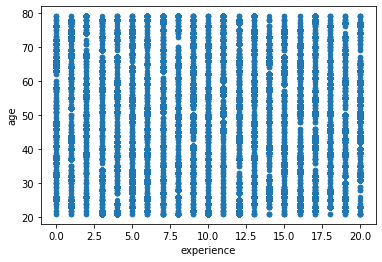

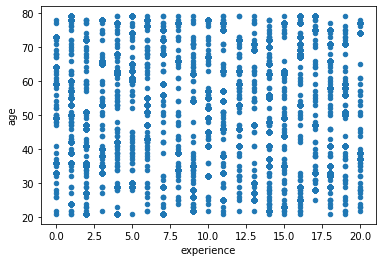

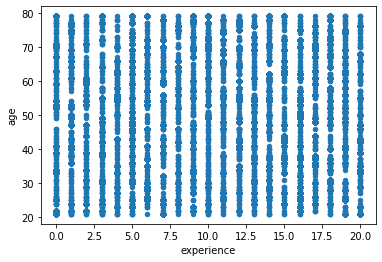

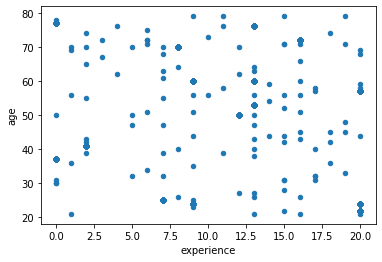

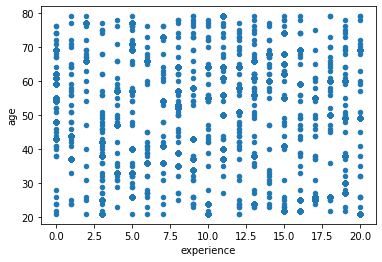

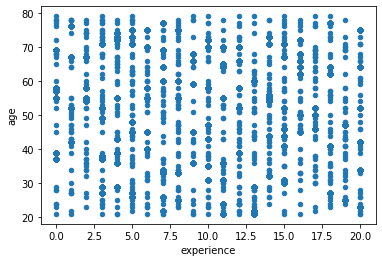

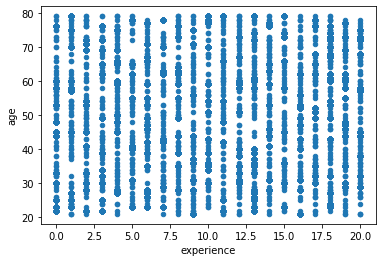

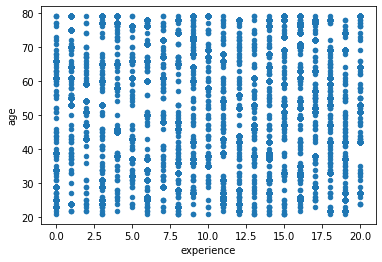

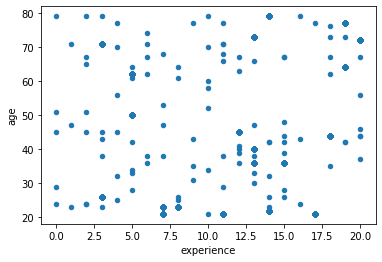

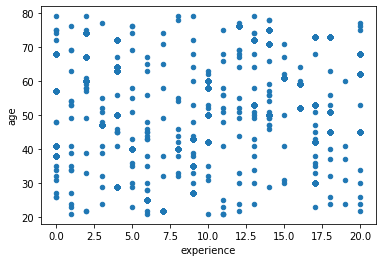

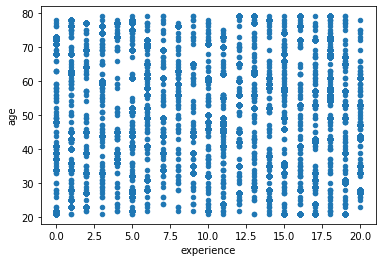

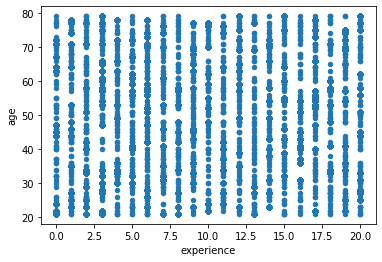

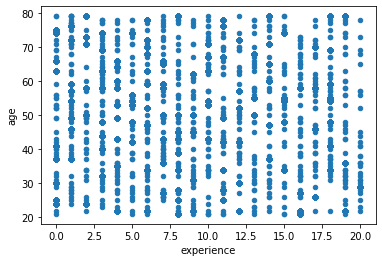

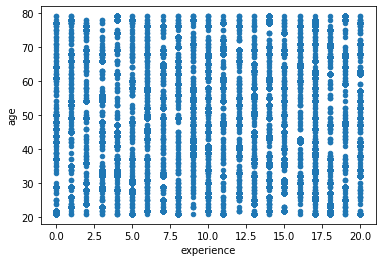

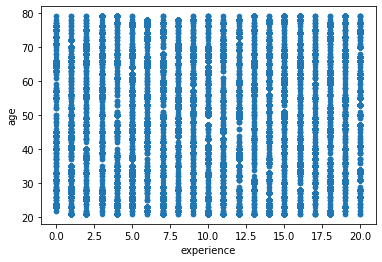

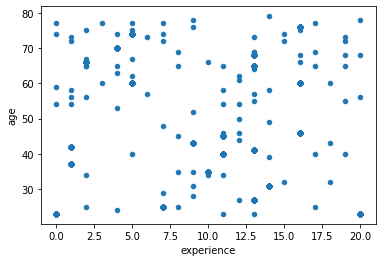

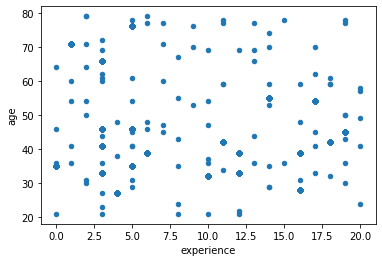

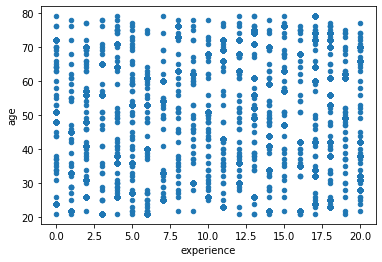

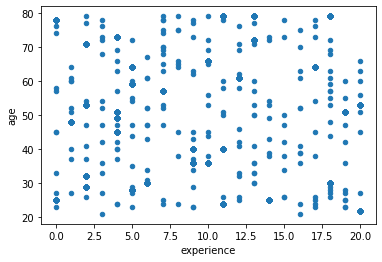

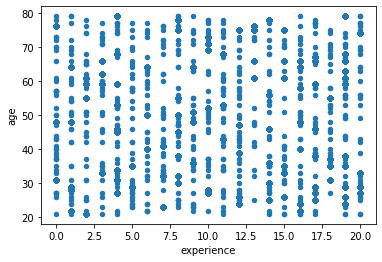

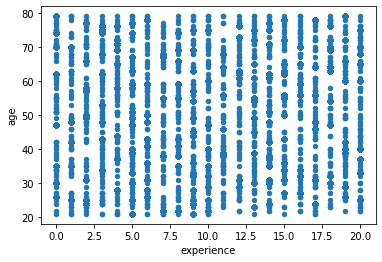

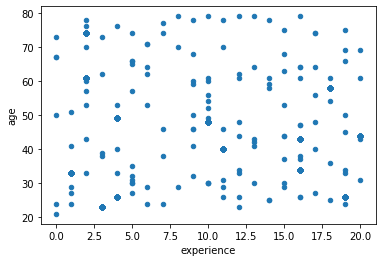

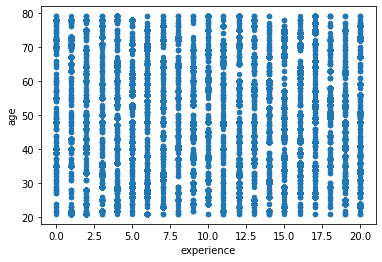

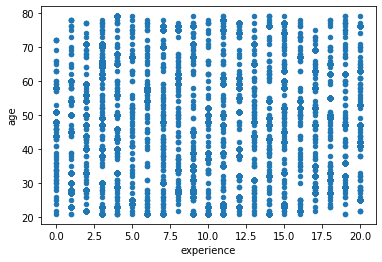

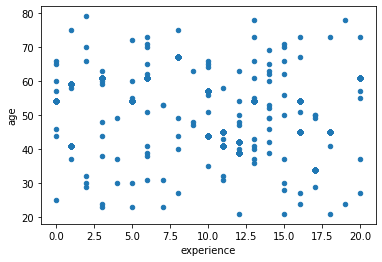

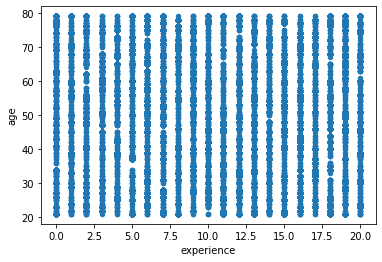

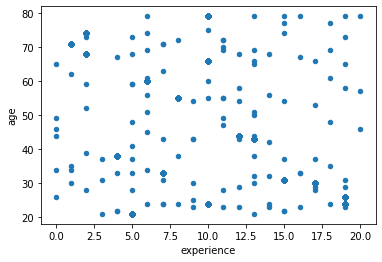

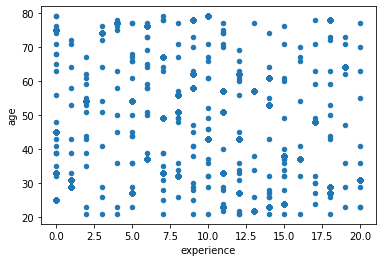

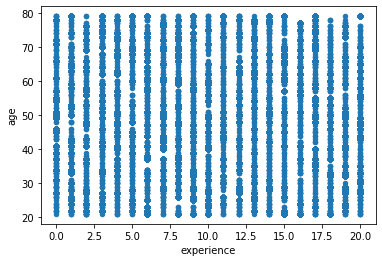

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#data.plot(y="income", x="state", alpha=0.2)
for state in np.unique(data['state']):
  query = 'state == "' + state + '"'
  data.query(query).plot(kind="scatter", y="age", x="experience")

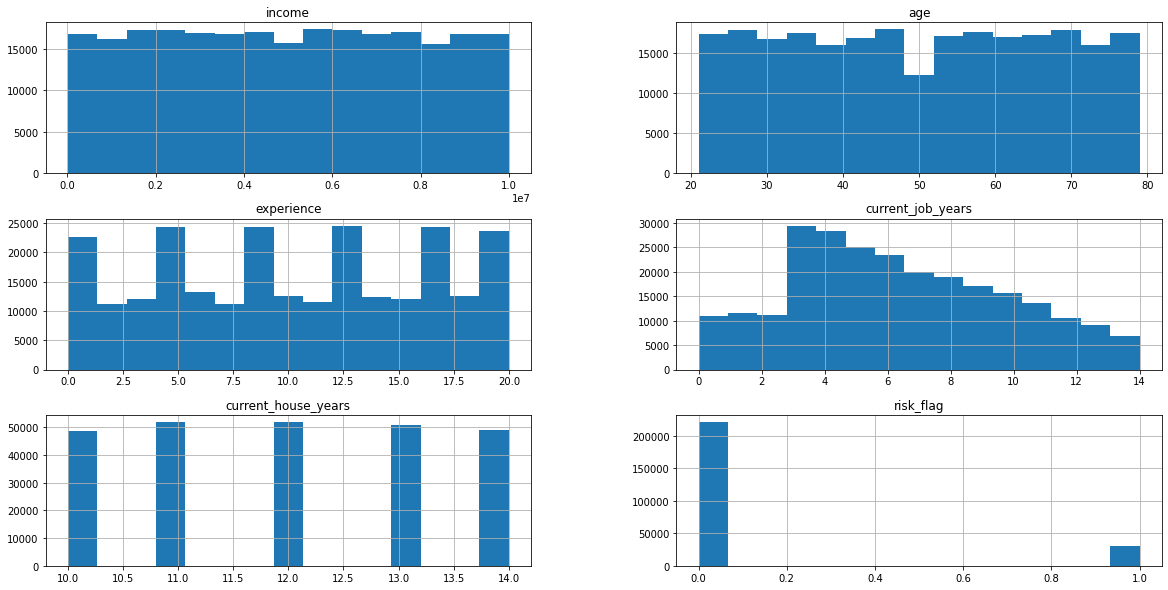

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data['income'].(bins=15, figsize=(20,10))
plt.show()